# Trefoil knot

In this example we demonstrate the fitting of a simplicial mixture model to data generated around a trefoil knot.

## Imports

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from smm.lemm import GraphMM, GLEMM_Parameters
from smm.helpfulfunctions import initialise_V

## Generate data

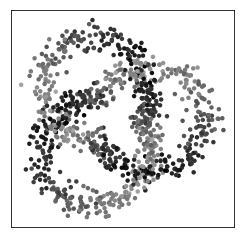

In [2]:
rnd = np.random.RandomState(123)

def points_from_trefoil(N, std=0):
    t = 2*np.pi*rnd.rand(N)
    x = (2+np.cos(3*t)) * np.cos(2*t)
    y = (2+np.cos(3*t)) * np.sin(2*t)
    z = np.sin(3*t)
    return np.vstack([x,y,z]).T + std * rnd.standard_normal(size=(N, 3))

X = points_from_trefoil(1000, 0.25)

plt.figure(figsize=(4,4))
plt.xticks(()); plt.yticks(())

col = X[:, 2].copy()  # Colour according to height
col -= col.min(); col /= 1.5*col.max()
plt.scatter(X[:,0], X[:,1], c=col, cmap='gray', vmin=0, vmax=1, lw=0, s=20)
plt.show()

## Fit and plot a SMM
The first step is to define the model and a set of initial parameters.

In [3]:
m = 20
L = GraphMM(m, 3, rnd=rnd)
TH = GLEMM_Parameters(initialise_V(X, m, rnd=rnd), L.M,
                      covar_type='spherical', covar=0.1)

Next the EM algorithm is run, in this case for just a few steps.

Then we plot the results, by sampling from the model we have just fitted, without the noise term.

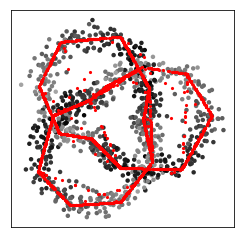

In [4]:
for _ in range(50):
    TH = L.step(TH, X)

fig, ax = plt.subplots(1,1,figsize=(4,4))
plt.xticks(())
plt.yticks(())

plt.scatter(X[:,0], X[:,1], c=col, cmap='gray', vmin=0, vmax=1, lw=0, s=20)

Y,_ = L.sample(TH, 2000)

plt.scatter(Y[:,0], Y[:,1], c='r', lw=0, s=10)
plt.show()

We can visualise how well the model is fitted by generating samples from the model and then comparing with the original data set.

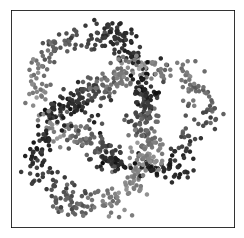

In [5]:
fig, ax = plt.subplots(1,1,figsize=(4,4))
plt.xticks(())
plt.yticks(())

Z,_ = L.noisy_sample(TH, 1000)

Z[:,2] -= Z[:,2].min()
Z[:,2] /= Z[:,2].max()
cols = np.zeros((Z.shape[0], 4))
cols[:,3] = 0.8*Z[:,2]


colZ = Z[:, 2]
colZ -= colZ.min(); colZ /= 1.5*colZ.max()
plt.scatter(Z[:,0], Z[:,1], c=colZ, cmap='gray', vmin=0, vmax=1, lw=0, s=20)
plt.show()